Hey I am Anushka and these are the models I implemented.


* Linear Regression
* Ridge and Lasso Regression both (improved a little bit not much)
* KNN (not as good as before)

* SVR (best one so far)
so i implemented Grid Search for the best parameters value in SVR -->best result so far consistently
tried cross validation score as well for this (did not work as good as before)

* Gaussian Process Regression(not as different)
* Bayesian Ridge (not as different)
* Random Forest (okayish)
* Decision Tree(worse than before)
* Gradient Boosting Regressor

You can view the models applied by going in the save version history of the notebook.

During the end i made another notebook for faster processing and tried to change the parameters in SVR model for better result with grid search included. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import BayesianRidge


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitgai/Train_Data.csv
/kaggle/input/iitgai/Test_Data1 (1).csv


In [2]:
df=pd.read_csv('//kaggle/input/iitgai/Train_Data.csv')

In [3]:
df.shape

(3132, 9)

dropping null rows

In [4]:
df=df.dropna()

In [5]:
df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [6]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype='object')

In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['A']= label_encoder.fit_transform(df['A'])

In [8]:
y_train=df['Target']

Drawing a heat map to get which column as the most correlation and which has the least

<Axes: >

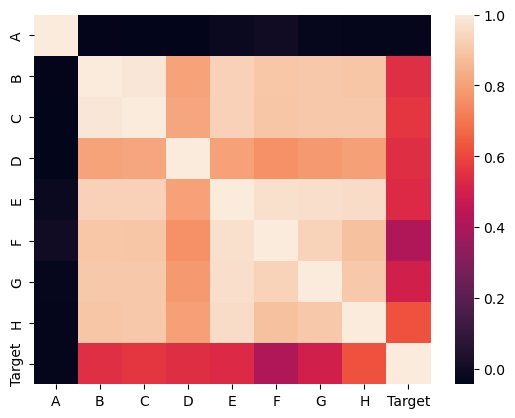

In [9]:
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(data=corr_matrix)

A has the least correlation. So dropping the column A.

In [10]:
new_x_train=df.drop(['A','Target'],axis=1)

In [11]:
new_x_train

,B,C,D,E,F,G,H
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350
...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235


In [12]:
y_train

0        9
1       12
2       10
3       15
4        6
        ..
3127     9
3128    12
3129    11
3130     9
3131     6
Name: Target, Length: 3132, dtype: int64

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn import svm

In [15]:
new_X_train, new_X_test, new_Y_train, new_Y_test=train_test_split(new_x_train, y_train, test_size=0.3)

svr = svm.SVR()

param_grid = {
    'C': [0.1, 0.01, 1, 10, 100, 1000],               
    'epsilon': [0.1 ,0.2, 0.3, 0.01, 1, 0.001],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svr, param_grid, cv=6, scoring='neg_mean_squared_error')
grid_search.fit(new_X_train, new_Y_train)
model2 = grid_search.best_estimator_

new_Y_pred=model2.predict(new_X_test)

In [16]:
error2= np.sqrt(mean_squared_error(new_Y_test, new_Y_pred))
print(error2)

2.2111012124119105


In [17]:
#r2_score(new_Y_test, new_Y_pred)

In [18]:
testdata=pd.read_csv("/kaggle/input/iitgai/Test_Data1 (1).csv")

In [19]:
testdata.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [20]:
testdata['A']= label_encoder.fit_transform(testdata['A'])

In [21]:
Index=testdata['Index']
tweakedx=testdata.drop(['A','Index'],axis=1)
y_pred3=model2.predict(tweakedx)

In [22]:
result=pd.DataFrame(Index, columns=['Index'])
result['Target']=y_pred3

In [23]:
result

,Index,Target
0,866,11.757690
1,1483,9.610138
2,599,14.919541
3,1702,11.622089
4,670,11.475556
...,...,...
1040,532,9.524076
1041,3417,9.275729
1042,1505,11.534183
1043,2245,11.165798


In [24]:
result.to_csv('2057_Anushka.csv', index=False)